In [189]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('C:/Users/red7740/Desktop/SharkAttacks/shark_attack_data.csv',encoding='latin-1')
del data['Date.1']
del data['Activity.1']
del data['Area.1']
del data['Location.1']
del data['Fatal?.1']
del data['Incident Type.1']
del data['Unnamed: 0']
data['Country'] = 'USA'
#data.Activity.fillna('',inplace=True)
#data.Sex.fillna('',inplace=True)

In [190]:
data['Incident Type'].value_counts().to_dict()


{'Unprovoked': 1657}

In [191]:
#make an age set
data.Age.fillna(0,inplace=True) #NaN vals -> 0
ages = pd.DataFrame(data['Age'].value_counts()).reset_index()
ages.columns = ['Age','Count']
unknownage = ages.iloc[0]
ages = ages[1:] #remove unkown age
ages = ages.sort_values('Age').reset_index()
del ages['index']


In [309]:
data['Age'] = data['Age'].str.replace(r'(.{2})or.*', r'\1')
data['Age'] = data['Age'].str.replace(r'(.{2})&.*', r'\1')
data['Age'] = data['Age'].str.replace(r'(.{2})\'s', r'\1')
data['Age'] = data['Age'].str.replace(r'(.{2})s', r'\1')
data['Age'] = data['Age'].str.replace(r'(6)[^0-9]', r'\1')
data['Age'] = data['Age'].str.replace(r'(young)', r'5') # hack to bin as child
data['Age'] = data['Age'].str.replace(r'teen', r'15') # hack to bin as teen
data['Age'] = data['Age'].str.replace(r'Teen', r'15') # hack to bin as teen
data['Age'] = data['Age'].str.replace(r'Elderly', r'80') #hack to bin as senior
data['Age'] = data['Age'].str.replace(r'mid-30', r'35') #hack to bin as senior
data.Age.fillna(0,inplace=True) #NaN vals -> 0
cats = ages[80:]
ages = ages[:80]
data['agebin'] = ''
age_bins = {'Child':0,'Teen':0,'Young Adult':0,'Adult':0,'Seniors':0}
for i in range(len(data['Age'])):
    
    if int(data['Age'][i]) <= 13: 
        age_bins['Child'] += 1
        data['agebin'][i] = 'Child'
    elif int(data['Age'][i]) <= 18:
        age_bins['Teen'] += 1
        data['agebin'][i] = 'Teen'
    elif int(data['Age'][i]) <= 25:
        age_bins['Young Adult'] += 1
        data['agebin'][i] = 'Young Adult'
    elif int(data['Age'][i]) <= 65:
        age_bins['Adult'] += 1
        data['agebin'][i] = 'Adult'
    else:
        age_bins['Seniors'] += 1
        data['agebin'][i] = 'Seniors'


In [310]:
data['agebin'].value_counts()

Child          626
Adult          466
Teen           274
Young Adult    273
Seniors         18
Name: agebin, dtype: int64

In [218]:
data.head()

,Date,Area,Location,Activity,Incident Type,Fatal?,GSAF Case #,Country,Name,Sex,Age,Injury,Time,Species,Investigator or Source,agebin
0,Unknown,Hawaii,Puna,NaN,Unprovoked,Non-fatal,ND.0010,USA,A chiefess,Female,0,Ankle bitten,NaN,NaN,Captain W. Young,Child
1,Unknown,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,Unprovoked,Non-fatal,ND.0014,USA,"""youthful male""",Male,0,"""Lost leg""",NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",Child
2,Unknown,Florida,"Gadsden Point, Tampa Bay",Fishing,Unprovoked,Non-fatal,ND.0019,USA,James Kelley,Male,0,2-inch lacerations,NaN,NaN,"T. Helm, p.219",Child
3,Unknown,Florida,"Palm Beach, Palm Beach County",Standing,Unprovoked,Non-fatal,ND.0056,USA,Horton Chase,Male,0,Abrasions & bruises hip to ankle,NaN,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",Child
4,Unknown,California,"Capistrano, Orange County",NaN,Unprovoked,Non-fatal,ND.0060,USA,girl,Female,0,Leg injured,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",Child


In [311]:

age_bins['Unknown'] = unknownage['Count']

#hack for categorical data cleanup -- can't automate
age_bins['Child'] += 1
age_bins['Teen'] += 7
age_bins['Young Adult'] += 1
age_bins['Seniors'] += 1

In [220]:
age_bins

{'Adult': 466,
 'Child': 523,
 'Seniors': 19,
 'Teen': 385,
 'Unknown': 427,
 'Young Adult': 274}

In [221]:
#make Gender set
by_gender = data['Sex'].value_counts().to_dict()
by_gender

{'Female': 270, 'Male': 1348, 'Unknown': 37, 'lli': 1}

In [222]:
#make Activity set
by_activity = data['Activity'].value_counts().to_dict()

In [373]:
data.Activity.fillna('',inplace=True) #NaN vals -> 0

In [374]:
#bin the incident types
data['ActBin'] = ''
for i in range(len(data['Activity'])):
    f = data['Activity'][i]
    if 'Swim' in str(f) or 'Swim' in str(f) or 'Escaping' in str(f) or 'Tread' in str(f):
        data['ActBin'][i] = 'Swimming'
    elif 'surf' in str(f) or 'Surf' in str(f) or 'board' in str(f):
        data['ActBin'][i] = 'Surfing'
    elif 'Bath' in str(f) or 'bath' in str(f) or 'wad' in str(f) or 'Wad' in str(f):
        data['ActBin'][i] = 'Bathing'
    elif 'div' in str(f) or 'ork' in str(f) or 'Div' in str(f):
        data['ActBin'][i] = 'Diving' 
    elif 'fish' in str(f) or 'Fish' in str(f) or 'crab' in str(f) or 'Crab' in str(f) or 'net' in str(f) or 'Net' in str(f):
        data['ActBin'][i] = 'Fishing'
    elif 'boat' in str(f) or 'Boat' in str(f) or 'Sail' in str(f) or 'Vessel' in str(f) or 'Canoe' in str(f) or 'Kayak' in str(f) or 'overboard' in str(f) or 'capsized' in str(f) or 'Washed' in str(f):
        data['ActBin'][i] = 'Boating' 
    elif str(f) == '':
        data['ActBin'][i] = 'Unknown'
    else:
        data['ActBin'][i] = 'Other'

In [375]:
data[data['ActBin']=='Other']

,Date,Area,Location,Activity,Incident Type,Fatal?,GSAF Case #,Country,Name,Sex,Age,Injury,Time,Species,Investigator or Source,agebin,ActBin
3,Unknown,Florida,"Palm Beach, Palm Beach County",Standing,Unprovoked,Non-fatal,ND.0056,USA,Horton Chase,Male,0,Abrasions & bruises hip to ankle,NaN,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",Child,Other
10,Unknown,Florida,Location unknown,Shark tagging,Unprovoked,Non-fatal,ND-0123,USA,Danniell Washington,Female,21,Severe abrasion to forearm from captive shark ...,18h00,"Blacktip shark, 5'",Daniell Washington,Young Adult,Other
33,08 Jun 1849,Florida,"Pensacola, Escambia County",Attempting to rescue woman seized by shark,Unprovoked,Fatal,1849.06.08.b,USA,Mr. Mansfield,Male,0,FATAL,NaN,NaN,"Adams Sentinel, 8/6/1849",Child,Other
82,06 Sept 1897,South Carolina,"Elliott Cut, Charleston County",Standing,Unprovoked,Non-fatal,1897.09.06,USA,Allan Fripp,Male,0,Lacerations to lower leg,NaN,NaN,"Hartford Courant, 8/7/1897",Child,Other
90,05 Sept 1900,Hawaii,"Waikiki Beach, Oahu",Floating,Unprovoked,Non-fatal,1900.09.05,USA,Joe Hartman,Male,0,"Bathing suit torn & ""imprints of the shark's t...",Afternoon,NaN,"Honolulu Republican, 9/6/1900",Child,Other
110,01 Jul 1907,South Carolina,Small creek near Coles Island,Floating in creek,Unprovoked,Non-fatal,1907.07.00,USA,C.B. Hernandez,Male,0,Slight injuries to left knee & calf,NaN,1.5 m [5'] shark,E. M. Burton,Child,Other
145,06 Apr 1919,Florida,"Florida Keys 25ºN,82ºW",Knocked into the water,Unprovoked,Fatal,1919.04.06,USA,"fisherman, a companion of J. Rose & W. Koegler",Male,0,FATAL,NaN,"3.7 m [12'], 1200-lb shark. Shark caught & its...","Gazette (Pittsburgh), no date",Child,Other
149,17 Jun 1922,Florida,"Municipal Pier, St. Petersburg, Tampa bay",Floating,Unprovoked,Fatal,1922.06.17,USA,Dorothy MacLatchie,Female,18,"FATAL, thigh bitten",NaN,1.8 m [6'] shark,"V.M. Coppleson, (1958) pp.155 & 252",Teen,Other
154,31 Jul 1924,South Carolina,"Folly Island, near Charleston",Standing,Unprovoked,Non-fatal,1924.07.31,USA,Lewis Kornahrens,Male,0,Left knee & leg bitten. (Tooth fragment recove...,NaN,"Mako shark, 1.9 m [6.5']. Tooth fragment recov...",E. M. Burton; E.W. Gudger (1935); V.M. Copples...,Child,Other
184,16 Jun 1933,South Carolina,"Folly Island, near Charleston",Standing,Unprovoked,Non-fatal,1933.06.16,USA,Emma G. Megginson,Female,0,Left calf bitten,NaN,NaN,E. M. Burton; Note: A. Resciniti lists date as...,Child,Other


In [376]:
#make act/fatal set
fatal_by_activity = data[['Fatal?','ActBin']]
isfat = fatal_by_activity[fatal_by_activity['Fatal?'] == 'Fatal']['ActBin']
notfat = fatal_by_activity[fatal_by_activity['Fatal?'] != 'Fatal']['ActBin']

In [377]:
#full_isfat = data[data['Fatal?'] == 'Fatal']
#fat_is_prov = full_isfat['Incident Type'].value_counts().to_dict()
#full_notfat = data[data['Fatal?'] != 'Fatal']
#notfat_is_prov = full_notfat['Incident Type'].value_counts().to_dict()
#notfat_is_prov

In [378]:
'''
isfat_bins = ['Swimming','Boating', 'Fishing', 'Water Sports','Other']
fat_bin_counts = {b: 0 for b in isfat_bins}
data['ActBin'] = ''
for f in isfat:
    if 'Swim' in str(f) or 'bathing' in str(f) or 'Swim' in str(f) or 'Escaping' in str(f) or 'Tread' in str(f):
        fat_bin_counts['Swimming'] += 1
    elif 'surf' in str(f) or 'Surfing' in str(f) or 'div' in str(f) or 'board' in str(f) or 'Kite' in str(f) or 'ork' in str(f):
        fat_bin_counts['Water Sports'] += 1
    elif 'fish' in str(f) or 'Fish' in str(f) or 'crab' in str(f) or 'net' in str(f):
        fat_bin_counts['Fishing'] += 1
    elif 'boat' in str(f) or 'Boat' in str(f) or 'Vessel' in str(f) or 'Canoe' in str(f) or 'Kayak' in str(f) or 'overboard' in str(f) or 'capsized' in str(f) or 'Washed' in str(f):
        fat_bin_counts['Boating'] += 1
    else:
        fat_bin_counts['Other'] += 1
'''

"\nisfat_bins = ['Swimming','Boating', 'Fishing', 'Water Sports','Other']\nfat_bin_counts = {b: 0 for b in isfat_bins}\ndata['ActBin'] = ''\nfor f in isfat:\n    if 'Swim' in str(f) or 'bathing' in str(f) or 'Swim' in str(f) or 'Escaping' in str(f) or 'Tread' in str(f):\n        fat_bin_counts['Swimming'] += 1\n    elif 'surf' in str(f) or 'Surfing' in str(f) or 'div' in str(f) or 'board' in str(f) or 'Kite' in str(f) or 'ork' in str(f):\n        fat_bin_counts['Water Sports'] += 1\n    elif 'fish' in str(f) or 'Fish' in str(f) or 'crab' in str(f) or 'net' in str(f):\n        fat_bin_counts['Fishing'] += 1\n    elif 'boat' in str(f) or 'Boat' in str(f) or 'Vessel' in str(f) or 'Canoe' in str(f) or 'Kayak' in str(f) or 'overboard' in str(f) or 'capsized' in str(f) or 'Washed' in str(f):\n        fat_bin_counts['Boating'] += 1\n    else:\n        fat_bin_counts['Other'] += 1\n"

In [379]:
'''
not_fat_bins = ['Swimming','Boating', 'Fishing', 'Water Sports','Other']
not_fat_bin_counts = {b: 0 for b in not_fat_bins}

for nf in notfat:
    if 'Swim' in str(nf) or 'bathing' in str(nf) or 'Swim' in str(nf) or 'Escaping' in str(nf) or 'Tread' in str(nf):
        not_fat_bin_counts['Swimming'] += 1
        data['ActBin'][i] = 'Swimming'
    elif 'surf' in str(nf) or 'Surfing' in str(nf) or 'div' in str(nf) or 'board' in str(nf) or 'Kite' in str(nf) or 'ork' in str(nf):
        not_fat_bin_counts['Water Sports'] += 1
        data['ActBin'][i] = 'Water Sports'
    elif 'fish' in str(nf) or 'Fish' in str(nf) or 'crab' in str(nf) or 'net' in str(nf):
        not_fat_bin_counts['Fishing'] += 1
        data['ActBin'][i] = 'Fishing'
    elif 'boat' in str(nf) or 'Boat' in str(nf) or 'Vessel' in str(nf) or 'Canoe' in str(nf) or 'Kayak' in str(nf) or 'overboard' in str(nf) or 'capsized' in str(nf) or 'Washed' in str(nf):
        not_fat_bin_counts['Boating'] += 1
        data['ActBin'][i] = 'Boating'
    else:
        not_fat_bin_counts['Other'] += 1
        data['ActBin'][i] = 'Other'
'''

"\nnot_fat_bins = ['Swimming','Boating', 'Fishing', 'Water Sports','Other']\nnot_fat_bin_counts = {b: 0 for b in not_fat_bins}\n\nfor nf in notfat:\n    if 'Swim' in str(nf) or 'bathing' in str(nf) or 'Swim' in str(nf) or 'Escaping' in str(nf) or 'Tread' in str(nf):\n        not_fat_bin_counts['Swimming'] += 1\n        data['ActBin'][i] = 'Swimming'\n    elif 'surf' in str(nf) or 'Surfing' in str(nf) or 'div' in str(nf) or 'board' in str(nf) or 'Kite' in str(nf) or 'ork' in str(nf):\n        not_fat_bin_counts['Water Sports'] += 1\n        data['ActBin'][i] = 'Water Sports'\n    elif 'fish' in str(nf) or 'Fish' in str(nf) or 'crab' in str(nf) or 'net' in str(nf):\n        not_fat_bin_counts['Fishing'] += 1\n        data['ActBin'][i] = 'Fishing'\n    elif 'boat' in str(nf) or 'Boat' in str(nf) or 'Vessel' in str(nf) or 'Canoe' in str(nf) or 'Kayak' in str(nf) or 'overboard' in str(nf) or 'capsized' in str(nf) or 'Washed' in str(nf):\n        not_fat_bin_counts['Boating'] += 1\n        d

In [380]:
data['ActBin'].head()

0     Unknown
1    Swimming
2     Fishing
3       Other
4     Unknown
Name: ActBin, dtype: object

In [381]:
fatsum = len(isfat)  
notfatsum = len(notfat)

In [382]:
fat_bin_counts = isfat.value_counts().to_dict()
not_fat_bin_counts  = notfat.value_counts().to_dict()

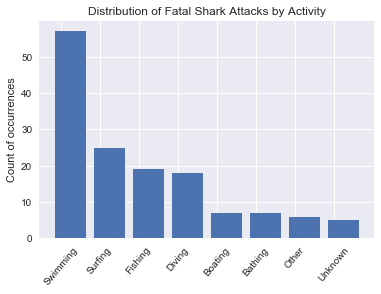

In [383]:
xvals = list(range(len(fat_bin_counts)))
labels = list(fat_bin_counts.keys())

import seaborn as sns
sns.set()

plt.bar(xvals,fat_bin_counts.values())
xticks_pos = [x - .25 for x in xvals]
plt.xticks(xticks_pos, labels, rotation='50')
plt.title('Distribution of Fatal Shark Attacks by Activity')
plt.ylabel('Count of occurrences')

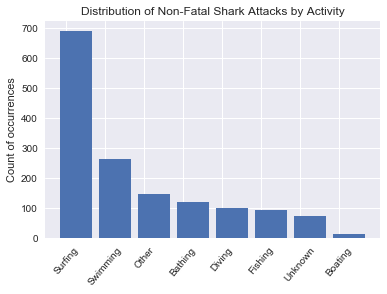

In [384]:
xvals = list(range(len(not_fat_bin_counts)))
labels = list(not_fat_bin_counts.keys())

import seaborn as sns
sns.set()

plt.bar(xvals,not_fat_bin_counts.values())
xticks_pos = [x - .25 for x in xvals]
plt.xticks(xticks_pos, labels, rotation='50')
plt.title('Distribution of Non-Fatal Shark Attacks by Activity')
plt.ylabel('Count of occurrences')

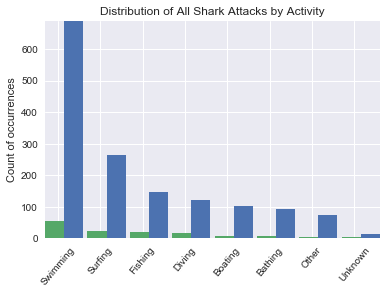

In [385]:
xvals = list(range(len(fat_bin_counts)))
x2vals = list(range(len(not_fat_bin_counts)))
labels = list(fat_bin_counts.keys())

import seaborn as sns
sns.set()
myplt = plt.subplot()
w=.45
plt.bar([x - w/2 for x in xvals],fat_bin_counts.values(), width=w, color='g', align='center')
plt.bar([x + w/2 for x in xvals], not_fat_bin_counts.values() , width=w, color='b', align='center')
xticks_pos = [x - .15 for x in xvals]
plt.xticks(xticks_pos, labels, rotation='50')
plt.title('Distribution of All Shark Attacks by Activity')
plt.ylabel('Count of occurrences')
plt.autoscale(tight=True)
plt.show()

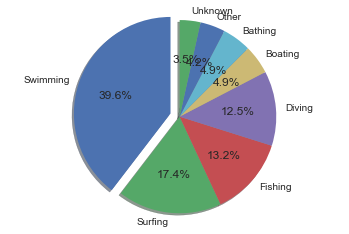

In [388]:
fatpievals = [f / fatsum for f in fat_bin_counts.values()]
explode = (0.1, 0, 0, 0,0,0, 0,0)  # only "explode" the 1st slice (i.e. 'Swimming')

fig1, ax1 = plt.subplots()
ax1.pie(fatpievals, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

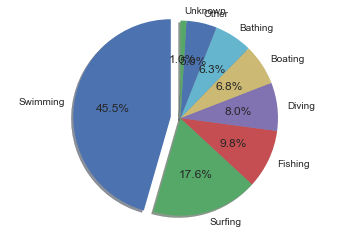

In [389]:
notfatpievals = [f / notfatsum for f in not_fat_bin_counts.values()]
explode = (0.1, 0, 0, 0,0,0, 0,0)  # only "explode" the 1st slice (i.e. 'Swimming')

fig1, ax1 = plt.subplots()
ax1.pie(notfatpievals, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<Container object of 5 artists>

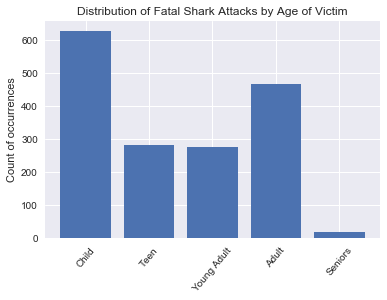

In [394]:
age_labels = list(age_bins.keys())
age_counts = age_bins.values()
xvals = list(range(6))
plt.xticks(xvals, age_labels, rotation='50')
plt.title('Distribution of Fatal Shark Attacks by Age of Victim')
plt.ylabel('Count of occurrences')
plt.bar(xvals, age_counts)

In [395]:
del age_bins['Unknown']

KeyError: 'Unknown'

<Container object of 5 artists>

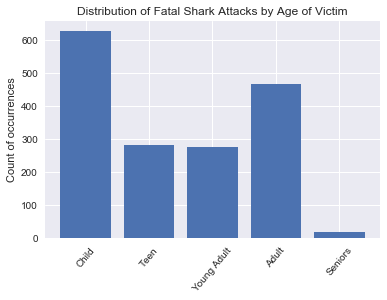

In [339]:
age_labels = list(age_bins.keys())
age_counts = age_bins.values()
xvals = list(range(5))
plt.xticks(xvals, age_labels, rotation='50')
plt.title('Distribution of Fatal Shark Attacks by Age of Victim')
plt.ylabel('Count of occurrences')
plt.bar(xvals, age_counts)

In [340]:
age_sum = sum(age_bins.values())

In [341]:
avales = []

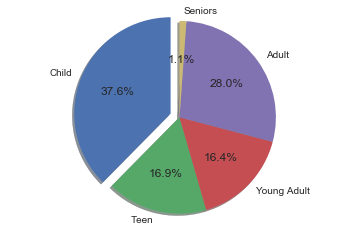

In [342]:
a_vals = [a / age_sum for a in age_bins.values()]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'Swimming')
alabels = list(age_bins.keys())
fig1, ax1 = plt.subplots()
ax1.pie(a_vals, explode=explode, labels=alabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

{'Child': 626, 'Adult': 466, 'Teen': 274, 'Young Adult': 273, 'Seniors': 18}


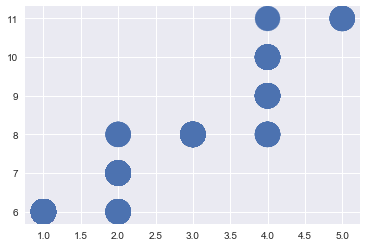

In [343]:
ageCounts = data['agebin'].value_counts().to_dict()
print(ageCounts)
agelabels = list(ageCounts.keys())
xvals = []
i = 1
for c in ageCounts.values():
    for r in range(c):
        xvals.append(i)
    i += 1
ActCounts = data['ActBin'].value_counts().to_dict()
actionlabels = list(ActCounts.keys())
yvals = []
j = 1
for c in ActCounts.values():
    for r in range(c):
        yvals.append(i)
    i += 1

import collections
import numpy as np

sizes = np.array(list(ageCounts.values()))

plt.scatter(xvals,yvals,s=sizes, marker='o')

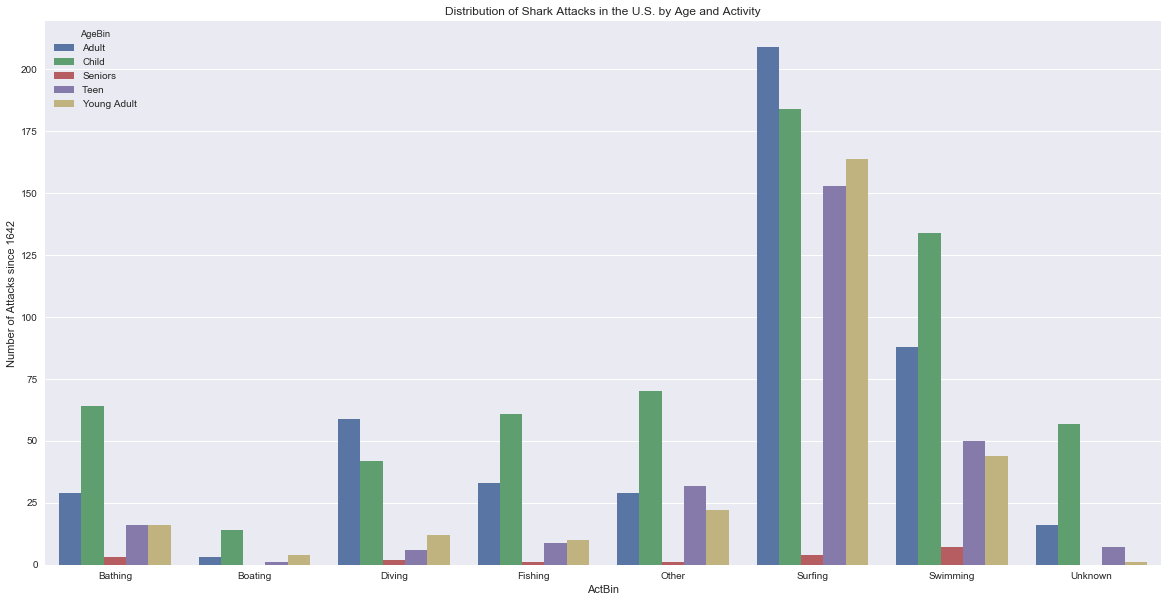

In [404]:
fig = plt.figure(figsize=(20,10))
test = data[['ActBin','agebin']].groupby(["ActBin",'agebin']).size()
test = pd.DataFrame(test)
test = test.reset_index()
test.columns = ['ActBin', 'AgeBin','Count']
#map actbin to ints to plot
#test.ActBin[:4] = 1 #Boating
#test.ActBin[4:9] = 2 #Fishing
#test.ActBin[9:14] = 5 # Other
#test.ActBin[14:19] = 4 # Swimming
#test.ActBin[19:] = 3 #Water Sports
actlabels=['Boating','Fishing','Water Sports','Swimming','Other']
sns.barplot(x="ActBin", y="Count", hue="AgeBin", data=test);
plt.title("Distribution of Shark Attacks in the U.S. by Age and Activity")
plt.ylabel("Number of Attacks since 1642")


In [286]:
test = data[['ActBin','agebin']].groupby(["ActBin",'agebin']).size()
test = pd.DataFrame(test)
test = test.reset_index()
test.columns = ['ActBin', 'AgeBin','Count']
test

,ActBin,AgeBin,Count
0,Boating,Adult,3
1,Boating,Child,14
2,Boating,Teen,1
3,Boating,Young Adult,4
4,Fishing,Adult,41
5,Fishing,Child,66
6,Fishing,Seniors,1
7,Fishing,Teen,14
8,Fishing,Young Adult,11
9,Other,Adult,77


In [403]:
data

,Date,Area,Location,Activity,Incident Type,Fatal?,GSAF Case #,Country,Name,Sex,Age,Injury,Time,Species,Investigator or Source,agebin,ActBin
0,Unknown,Hawaii,Puna,,Unprovoked,Non-fatal,ND.0010,USA,A chiefess,Female,0,Ankle bitten,NaN,NaN,Captain W. Young,Child,Unknown
1,Unknown,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,Unprovoked,Non-fatal,ND.0014,USA,"""youthful male""",Male,0,"""Lost leg""",NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",Child,Swimming
2,Unknown,Florida,"Gadsden Point, Tampa Bay",Fishing,Unprovoked,Non-fatal,ND.0019,USA,James Kelley,Male,0,2-inch lacerations,NaN,NaN,"T. Helm, p.219",Child,Fishing
3,Unknown,Florida,"Palm Beach, Palm Beach County",Standing,Unprovoked,Non-fatal,ND.0056,USA,Horton Chase,Male,0,Abrasions & bruises hip to ankle,NaN,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",Child,Other
4,Unknown,California,"Capistrano, Orange County",,Unprovoked,Non-fatal,ND.0060,USA,girl,Female,0,Leg injured,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",Child,Unknown
5,Unknown,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,Unprovoked,Fatal,ND.0078,USA,male,Male,0,FATAL,NaN,NaN,"W.H. Gregg, p.19; L. Schultz & M. Malin, ...",Child,Boating
6,Unknown,California,"LaJolla, San Diego County","Free diving, collecting sand dollars",Unprovoked,Non-fatal,ND.0083,USA,Charles Fleming,Male,0,Calf bitten,NaN,"Shovelnose guitarfish, adult male","C. Limbaugh in Sharks & Survival, pp.77-78",Child,Diving
7,Unknown,Florida,"Key West, Monroe County",Kitesurfing,Unprovoked,Non-fatal,ND.0097,USA,Paul Menta,Male,0,Hand bitten,NaN,NaN,Internet,Child,Surfing
8,Unknown,Florida,"Tampa Bay, Hillsborough County",Wade-fishing,Unprovoked,Non-fatal,ND-0109,USA,Ed Snyder,Male,0,"No injury, shark rammed his back",NaN,NaN,Fishingworld.com,Child,Bathing
9,Unknown,Florida,"Lost Tree Village, Palm Beach County",Surfing,Unprovoked,Non-fatal,ND-0122,USA,C.M,Male,0,Legs bitten,NaN,NaN,M. Vorenberg,Child,Surfing
